# Machine Learning

## Overview
*Derived from a Lesson by Allison Earnhart*

While **artificial intelligence** and machines that learn may sound like topics from science fiction, our modern world is full of “intelligent” machines that process data and make decisions not unlike the way humans do. Traditional computers can only perform the specific tasks for which they have been programmed. When a computer has the ability to independently make decisions without direct instruction, that is Artificial Intelligence (AI). AI can employ many layers of algorithms, a process of problem-solving rules, to respond to new situations in a way that traditional computers can’t. From self-driving vehicles to spell check and predictive text, AI is assisting the world with all kinds of work.

How is your music streaming service able to predict which new songs you’ll probably enjoy hearing? How does your social media service recognize your face even when you haven’t been tagged in the photo? These systems work with huge amounts of data and find ways to sort it into meaningful identifications for decision making -- a process called **Machine Learning** (ML). There are three methods by which computer systems learn: **Supervised, Unsupervised, and Reinforcement**. In **supervised** learning, the system is given pre-identified examples to use as a reference. When the system encounters new data, it is compared to the examples to help determine the new data’s classification. With **unsupervised** learning, the system finds its own patterns when analyzing data and sorts it into logical categories. New data is compared to the patterns and categorized accordingly. Both of these methods can be supplemented by **reinforcement**, when a system can hone its accuracy by receiving feedback on whether a decision is correct or incorrect, and modifying its algorithm accordingly. Just like with humans, practice makes perfect. The more data a system learns with, the more accurate its future decisions can be.

It is also important to acknowledge the ethical hazards that exist with machine learning, especially on the topic of **bias**. Machines that learn from biased data sets can perpetuate that bias, causing unfair or inaccurate outcomes. Biased data sets can be anything from scientifically incomplete or statistically skewed information, to socially or morally questionable content created by people with conscious or unconscious prejudice or favoritism. AI systems are rapidly being integrated into society everywhere in fields as diverse as medical diagnoses, job applicant reviews, plagiarism detection, and criminal justice profiling. AI is an automated decision making process, which can be inequitable or even harmful when left to itself without the contextual awareness that human minds possess.

# Supervised Simple Classifier - Morse Code Machine

In ML, **Classification**, is when a computer is expected to take some amount of data (an **observation**) and from that, determine what is happening by assigning that data a **category**. Categories are discrete words, descriptions or groups for describing the data by putting it in a group. For example, categories of vehicles could be "trucks", "buses", "sedans", "coupes", etc. there are many different examples of vehicles within each category but they all have commonalities.

In Classification, we are showing a computer program many examples and asking the program to find the commonalities.

When we use supervised ML, the system goes through 3 main stages:

1. **Training** - The system collects many **observations** which are matched with human provided **labels** (e.g. correct categories). 
2. **Modelling** - The system uses the training data to construct a model (e.g. find the commonalities).
3. **Prediction** - Provided a new unlabelled **observation**, the program uses the model to determine what category or label should be applied to that observation.

Let's create a machine that takes a simple observation (namely, how long a button is pressed) and classifies the press types to recognize morse code.

[Morse code is a method used in telecommunication to encode text characters as standardized sequences of two different signal durations, called dots and dashes.](https://en.wikipedia.org/wiki/Morse_code)

## Exercise 1

Take a look at the provided code below.

We want this classifier uses the length of a button press to determine if it is a dot or dash. We collect will some number of training samples of each and take the average to finding the average length of a dot or dash.

Then when a button is pressed, the length of that press is compared to the average length of a dot and dash. We decide with 'classifier' which (dot or dash) that press is more similar too.

You need to add in the *model*. Look for the TO DOs:

1. Calculate the Average Times for Dashes and Dots

2. Fix the `classify` function, In order to decide if the "time" given, is a dot or a dash, you need to calculate the number is more similiar to the dot average or the dash average. There are multiple ways to do this.

In [ ]:
"""
===================================================================================
Importing and Initializing
===================================================================================
"""
import easygopigo3
import gopigo3
import easysensors
egpg = easygopigo3.EasyGoPiGo3()
gpg = gopigo3.GoPiGo3()
egpg.reset_all()

# IMPORT TOOLS FOR MAKING JUPYTER EASIER TO READ
from IPython.display import clear_output
from EDL_Jupyter_resources import HiddenPrints

# IMPORT USFUL TOOLS
import time
import math
import numpy as np
import matplotlib.pyplot as plt
hiddenprints=HiddenPrints()


# INITIALIZE A BUTTON (TELL THE ROBOT THERE IS A BUTTON)
my_button = egpg.init_button_sensor("AD2")
PRESSED = 1

"""
===================================================================================
SOME CUSTOM FUNCTIONS
We define them here so that we can use them later.
===================================================================================
"""

def record_button_press_time():
    # This function measures how long a button is pressed for.
    while not my_button.read() == PRESSED:
        # Wait for press
        time.sleep(.01)
    down_time = time.time()
    while my_button.read() == PRESSED:
        # Wait for release
        time.sleep(.01)
    up_time = time.time()     
    return up_time - down_time


def collect_training_presses(number, type_name):
    # This function collects "number" samples of "type_name" and records the durations in an array "times"
    times = np.zeros(number)
    for press_num in range(number):
        print("Waiting for ", type_name, " PRESS ", press_num+1, " of ", number)
        times[press_num] = record_button_press_time()
    return times

def classify(time, dot_average, dash_average):
    # This function should:
    # RETURN "-" if the time is for a dash, or "." if the time is for a dot.
    """
    TO DO:
    In order to decide if the "time" given, is a dot or a dash, you need to calculate the number 
    is more similiar to the dot average or the dash average. There are multiple ways to do this.
    """
    if True:  # THIS IS A PLACEHOLDER TO REPLACE
        return "."
    else:
        return "-"

    
    
"""
===================================================================================
CODE THAT RUNS
===================================================================================
""" 

"""
Collect LABELED TRAINING samples
"""
try:
    if not dot_average is None and not dash_average is None:
        # If it is already trained, allow the user to decide whether to train again.
        train = input("Do you want to retrain? 1 = Yes, 0 = No ")
        try:
            train = int(train)
        except:
            print("*** Please provide an integer ***")
except:
    train = 1 # This is a 1 if the system needs to be trained
        
if train == 1:
    # If training or retraining:
    # Ask how many samples to collect.
    collect_number = input("How many training samples do you want to give? ")
    try:
        collect_number = int(collect_number)
    except:
        print("*** Please provide an integer ***")
    
    #Collect the samples
    print("DOTS")
    dot_times = collect_training_presses(collect_number, "Dot")

    print("DASHES")
    dash_times = collect_training_presses(collect_number, "Dash")

    print("Dot Times: ", dot_times)
    print("Dash Times: ", dash_times)


"""
TO DO: 
 Calculate the Average Times for Dashes and Dots
 np.mean(ARRAY) will return the mean of an array
 np.sum(ARRAY) will return the sum of an array
 np.size(ARRAY) will return the number of items in an array
"""
dot_average = 0 # THIS IS A PLACEHOLDER TO REPLACE
dash_average = 1 # THIS IS A PLACEHOLDER TO REPLACE

print("Dot Average: ", dot_average)
print("Dash Average: ", dash_average)

print("===================")
print("STARTING IN")
time.sleep(1)
print("3...")
time.sleep(1)
print("2...")
time.sleep(1)
print("1...")
time.sleep(1)
print("GO")
print("===================")

last_press_time = time.time()
space_time = False
message = [] # Initialize a blank message
letter = "" # Initialize a blank message


"""
ONCE TRAINED THE FOLLOWING LOOP WILL TEST THE CLASSIFIER
"""
while True: 
    
    # If there has not been a press in a while, stop the program
    if time.time() - last_press_time > 8*dash_average:
        print("===================")     
        break
            
    # If the button is pressed, decide if it is a dot or a dash.
    elif my_button.read() == PRESSED:
        down_time = time.time()
        while my_button.read() == PRESSED:
            time.sleep(.01)
        up_time = time.time()
        press_time = up_time - down_time
        print("Saw: ", classify(press_time, dot_average, dash_average))
        last_press_time = up_time
    
print("DONE")


# Reading Morse Code

Now that your DOT - DASH classifier is working, let's try to write some MORSE CODE MESSAGES.

Here are some letters and numbers in morse code.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/International_Morse_Code.svg/500px-International_Morse_Code.svg.png)

## Exercise 2

Update the following code with your classifier from EX 1 to start reading messages.

Test out some messages .... can you send:

1. **SOS** (Save our ship, an intentionally easy to remember morse code signal for emergencies)

2. **HELLO** 

3. **Your Name**

### Optional Challenges
* Can you program the robot to flash the LEDs when the button is pressed?
* After the message has been decoded in text to confirm accuracy, can you program the robot to flash the LEDs in the morse code pattern (using the trained dot and dash average lengths of course)?

In [ ]:
"""
===================================================================================
Importing and Initializing
===================================================================================
"""
import easygopigo3
import gopigo3
import easysensors
egpg = easygopigo3.EasyGoPiGo3()
gpg = gopigo3.GoPiGo3()
egpg.reset_all()

# IMPORT TOOLS FOR MAKING JUPYTER EASIER TO READ
from IPython.display import clear_output
from EDL_Jupyter_resources import HiddenPrints

# IMPORT USFUL TOOLS
import time
import math
import numpy as np
import matplotlib.pyplot as plt
hiddenprints=HiddenPrints()


# INITIALIZE A BUTTON (TELL THE ROBOT THERE IS A BUTTON)
my_button = egpg.init_button_sensor("AD2")
PRESSED = 1


# SETUP A DICTIONARY FOR MORSE CODE TRANSLATION
MORSE_CODE = {     '.-':'A',  '-...':'B', 
                 '-.-.':'C',   '-..':'D',        '.':'E', 
                 '..-.':'F',   '--.':'G',     '....':'H', 
                   '..':'I',  '.---':'J',      '-.-':'K', 
                 '.-..':'L',    '--':'M',       '-.':'N', 
                  '---':'O',  '.--.':'P',     '--.-':'Q', 
                  '.-.':'R',   '...':'S',        '-':'T', 
                  '..-':'U',  '...-':'V',      '.--':'W', 
                 '-..-':'X',  '-.--':'Y',     '--..':'Z', 
                '.----':'1', '..---':'2',    '...--':'3', 
                '....-':'4', '.....':'5',    '-....':'6', 
                '--...':'7', '---..':'8',    '----.':'9', 
                '-----':'0', '--..--':',',  '.-.-.-':'.', 
               '..--..':'?',  '-..-.':'/',  '-....-':'-', 
                '-.--.':'(', '-.--.-':')',       ' ':' ',
                'END':""} 

"""
===================================================================================
SOME CUSTOM FUNCTIONS
We define them here so that we can use them later.
===================================================================================
"""

def record_button_press_time():
    # This function measures how long a button is pressed for.
    while not my_button.read() == PRESSED:
        # Wait for press
        time.sleep(.01)
    down_time = time.time()
    while my_button.read() == PRESSED:
        # Wait for release
        time.sleep(.01)
    up_time = time.time()     
    return up_time - down_time


def collect_training_presses(number, type_name):
    # This function collects "number" samples of "type_name" and records the durations in an array "times"
    times = np.zeros(number)
    for press_num in range(number):
        print("Waiting for ", type_name, " PRESS ", press_num+1, " of ", number)
        times[press_num] = record_button_press_time()
    return times

def classify(time, dot_average, dash_average):
    # This function should:
    # RETURN "-" if the time is for a dash, or "." if the time is for a dot.
    """
    TO DO:
    Add your classifier from EX1
    """
    if True:  # THIS IS A PLACEHOLDER TO REPLACE
        return "."
    else:
        return "-"

    
    
"""
===================================================================================
CODE THAT RUNS
===================================================================================
""" 

"""
Collect LABELED TRAINING samples
"""
try:
    if not dot_average is None and not dash_average is None:
        # If it is already trained, allow the user to decide whether to train again.
        train = input("Do you want to retrain? 1 = Yes, 0 = No ")
        try:
            train = int(train)
        except:
            print("*** Please provide an integer ***")
except:
    train = 1 # This is a 1 if the system needs to be trained
        
if train == 1:
    # If training or retraining:
    # Ask how many samples to collect.
    collect_number = input("How many training samples do you want to give? ")
    try:
        collect_number = int(collect_number)
    except:
        print("*** Please provide an integer ***")
    
    #Collect the samples
    print("DOTS")
    dot_times = collect_training_presses(collect_number, "Dot")

    print("DASHES")
    dash_times = collect_training_presses(collect_number, "Dash")

    print("Dot Times: ", dot_times)
    print("Dash Times: ", dash_times)


"""
TO DO: 
 Calculate the Average Times for Dashes and Dots
 Add you calculations from EX1
"""
dot_average = 0 # THIS IS A PLACEHOLDER TO REPLACE
dash_average = 1 # THIS IS A PLACEHOLDER TO REPLACE

print("Dot Average: ", dot_average)
print("Dash Average: ", dash_average)

print("===================")
print("STARTING IN")
time.sleep(1)
print("3...")
time.sleep(1)
print("2...")
time.sleep(1)
print("1...")
time.sleep(1)
print("GO")
print("===================")

last_press_time = time.time()
space_time = False
message = [] # Initialize a blank message
letter = "" # Initialize a blank message

"""
ONCE TRAINED THE FOLLOWING LOOP WILL COLLECT A MESSAGE
"""
while True: 
    
    # If there is a long pause, calculate the message.
    if not my_button.read() == PRESSED and time.time() - last_press_time > 8*dash_average:
        if message[-1] == " ":
            print("END MESSAGE")
            print("===================")

            message[-1] = "END"          
            break
    
    # If there is a medium pause, add a space.
    elif not my_button.read() == PRESSED and time.time() - last_press_time > 4*dash_average:
        if letter == "" and not message[-1] == " " :
            print("SPACE")
            print("NEXT LETTER ===========")
            message.append(" ")
          
        
    # If there is a short pause, go to next letter.
    elif not my_button.read() == PRESSED and time.time() - last_press_time > 2*dash_average:
        if not letter == "":
            print("NEXT LETTER ===========")
            message.append(letter)
            letter = "" 
            
    # If the button is pressed, decide if it is a dot or a dash.
    elif my_button.read() == PRESSED:
        down_time = time.time()
        while my_button.read() == PRESSED:
            time.sleep(.01)
        up_time = time.time()
        press_time = up_time - down_time
        print("Saw: ", classify(press_time, dot_average, dash_average))
        letter = letter + classify(press_time, dot_average, dash_average)
        last_press_time = up_time
    
print(message)

"""Translate the Morse Code into Letters"""
message_as_letters = ""
for code in message:
    try:
        message_as_letters = message_as_letters + MORSE_CODE[code]
    except:
        print("DID NOT RECOGNIZE: ", code)
print("===================")
print("Message: ", message_as_letters)

# Nearest Neighbor Algorithm 

The Nearest Neighbor Algorithm (and it's close cousin the K-Nearest Neighbor Algorithm) are a simple but powerful supervised classifier. 

In the Nearest Neighbor Algorithm, we collect a large number of training labelled observations. Then when we take a new observation, we compare it to all the training examples and find that which is most similar ("the nearest neighbor") the new observation receives the same label as that nearest neighbor.

Let's use this to make our color sensor way more powerful.

The color sensor documentation is [HERE](https://di-sensors.readthedocs.io/en/master/api-basic.html#easylightcolorsensor). In the documentation, you can see that the color sensor is able to classify 8 colors total:

| Color   | R, G, B       |
|---------|---------------|
| black   | 0, 0, 0       |
| blue    | 0, 0, 255     |
| cyan    | 0, 255, 255   |
| fuchsia | 255, 0, 255   |
| green   | 0, 255, 0     |
| red     | 255, 0, 0     |
| white   | 255, 255, 255 |
| yellow  | 255, 255, 0   |

That is great and all, but how many of those super bright and specific colors do you have around your house?

Even more important, those colors are sensitive to the lighting conditions in your house.

## Exercise 3

Let try that built-in behavior with the example code below.

Try the sensor on a bunch of objects around the house. Try:

1. A bunch of colors --- what happens if the object is orange or pinK or purple?

2. What else effects the color? Distance from the object? Outside lighting? Angle of surface?

In [ ]:
from time import sleep
from di_sensors.easy_light_color_sensor import EasyLightColorSensor

my_lcs=EasyLightColorSensor(led_state=True) #initialize sensor

print('Sensor initialized, reading color for 10 seconds')

for i in range(10): #read for 10 seconds
    in_color = my_lcs.safe_raw_colors() #get raw data
    candidate = my_lcs.guess_color_hsv(in_color)[0] #get the computer's guess
    print("I think the color is: %s"%candidate)
    sleep(1)
    
print("Done!")

Let's do better with Nearest Neighbor classifier.

We will collect training values for a variety of colors, label them, take a new measurement, and use the earlier labels to describe the new color.


## Exercise 4

In order to get our nearest neighbor algorithm working, look for the TO DO. Calculate the distance between the new value and the trained values (we recommend a 3D distance formula). This will create an array of distances and then we can find which neighbor is actually the closest.

Once you see how this is working, feel free to customize it as you see fit.


Do you want to retrain? 1 = Yes, 0 = No 0


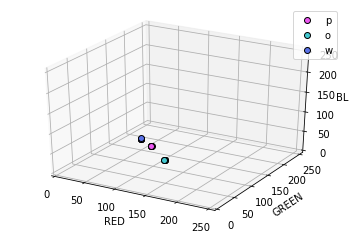

====== 10 Seconds of Testing ======= 
I think that is:  p
I think that is:  p
I think that is:  p
I think that is:  p
I think that is:  p
I think that is:  p
I think that is:  p
I think that is:  p
I think that is:  p
======= DONE ======


In [33]:
## """Some import statements"""
from time import sleep
from di_sensors.easy_light_color_sensor import EasyLightColorSensor
import easygopigo3
import gopigo3
import easysensors
egpg = easygopigo3.EasyGoPiGo3()
gpg = gopigo3.GoPiGo3()
egpg.reset_all()

# IMPORT TOOLS FOR MAKING JUPYTER EASIER TO READ
from IPython.display import clear_output
from EDL_Jupyter_resources import HiddenPrints

# IMPORT USFUL TOOLS
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
hiddenprints=HiddenPrints()

"""
========================================
Custom Functions
We define them here so that we can use them later.
========================================
"""
def take_color_with_button():
    while not my_button.read() == PRESSED:
        # Wait for press
        time.sleep(.01)
    rgb = my_color_sensor.safe_rgb()
    while my_button.read() == PRESSED:
        # Wait for release
        time.sleep(.01)    
    return rgb

def find_nearest_neighbor(color, trained_colors):
    distances = np.zeros((trained_colors.shape[0]))
    new_R, new_G, new_B = color
    for c in range(trained_colors.shape[0]):
        # Loop through all the trained values and calculate their distance to the newest color
        trained_R = trained_colors[c, 1]
        trained_G = trained_colors[c, 2]
        trained_B = trained_colors[c, 3]
        """
        TO DO:
        Calculate the distance between the new value and the trained value 
        (we recommend a 3D distance formula)
        """
        distance = 1 # Replace 1 --- it is a placeholder
        
        distances[c] = distance # Save the distance in the distance array
    
    nearest_neighbor = np.argmin(distances) # Find the index of the smallest distance.
    return nearest_neighbor
    
def classify_colors(color, trained_colors, labels):
    nearest_neighbor = find_nearest_neighbor(color, trained_colors)
    nearest_class = int(trained_colors[nearest_neighbor, 0])
    nearest_label = labels[nearest_class]
    return nearest_label 

def plot_colors(trained_colors, labels):
    color_count = np.max(trained_colors[:,0])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(int(color_count)+1):
        matches = trained_colors[:,0] == i
        color = np.random.random([3])
        ax.plot(trained_colors[matches,1], trained_colors[matches,2], trained_colors[matches,3],
                'o', markerfacecolor=color, markeredgecolor='k', label = labels[i])
    plt.legend()
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)
    ax.set_xlabel('RED')
    ax.set_ylabel('GREEN')
    ax.set_zlabel('BLUE')
    plt.show()


"""
========================================
Code that runs
========================================
"""

# Initialize the color sensor
my_color_sensor=EasyLightColorSensor(led_state=True) #initialize sensor

my_button = egpg.init_button_sensor("AD2")
PRESSED = 1

try:
    trained_colors[0,0]
    # If it is already trained, allow the user to decide whether to train again.
    train = input("Do you want to retrain? 1 = Yes, 0 = No ")
    try:
        train = int(train)
    except:
        print("*** Please provide an integer ***")
except:
    train = 1 # This is a 1 if the system needs to be trained

egpg.open_eyes()
if train == 1:
    """TRAINING"""
    # If training or retraining:
    # Ask how many samples to collect.
    num_colors = int(input("How many colors will you train? (at least 2) "))
    num_samples= int(input("How many training samples will you take of each color? (at least 3) "))
    labels = {} 
    trained_colors = np.zeros((num_samples*num_colors, 4)) #Make a table of samples with labels and RGB values

    for c in range(num_colors):
        color_name = input("What will you call color number " +str(c+1)+ "? ")
        labels.update({c:color_name})
        for i in range(num_samples):
            print("Press button to take sample " + str(i+1) +" of " + str(num_samples) + " of " + color_name)
            R, G, B = take_color_with_button()
            trained_colors[c*num_samples + i, 0] = c # label this color with name
            trained_colors[c*num_samples + i, 1] = R # record green value
            trained_colors[c*num_samples + i, 2] = G # record green value
            trained_colors[c*num_samples + i, 3] = B # record blue value
            egpg.set_eye_color((R//3, G//3, B//3))
            egpg.open_eyes()

            
            
start_time = time.time()
plot_colors(trained_colors, labels)
#print(trained_colors)
#print(labels)

print("====== 10 Seconds of Testing ======= ")

#Classifying for 10 seconds
while time.time() - start_time < 10:
    color = my_color_sensor.safe_rgb()
    label = classify_colors(color, trained_colors, labels)
    print("I think that is: ", label)
    time.sleep(1)

print("======= DONE ======")


When we use K-Nearest Neighbor Classification instead of Nearest Neighbor Classification, we decide on the class of the new data based on multiple nearby data points (instead of just one!)

We will not have you write that code, as we have not really covered the tools that make it easy. 

# Unsupervised K-Means Clustering

When using Nearest 

### NEED TO FINISH THIS AND FIX CODE


Do you want to retrain? 1 = Yes, 0 = No o
*** Please provide an integer ***


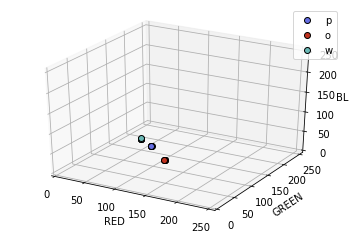

====== 10 Seconds of Testing ======= 
p
p
p
p
p
p
p
p
p
======= DONE ======


In [34]:
## """Some import statements"""
from time import sleep
from di_sensors.easy_light_color_sensor import EasyLightColorSensor
import easygopigo3
import gopigo3
import easysensors
egpg = easygopigo3.EasyGoPiGo3()
gpg = gopigo3.GoPiGo3()
egpg.reset_all()

# IMPORT TOOLS FOR MAKING JUPYTER EASIER TO READ
from IPython.display import clear_output
from EDL_Jupyter_resources import HiddenPrints

# IMPORT USFUL TOOLS
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
hiddenprints=HiddenPrints()

"""
========================================
Custom Functions
We define them here so that we can use them later.
========================================
"""
def take_color_with_button():
    while not my_button.read() == PRESSED:
        # Wait for press
        time.sleep(.01)
    rgb = my_color_sensor.safe_rgb()
    while my_button.read() == PRESSED:
        # Wait for release
        time.sleep(.01)    
    return rgb

def find_nearest_neighbor(color, trained_colors):
    distances = np.zeros((trained_colors.shape[0]))
    new_R, new_G, new_B = color
    for c in range(trained_colors.shape[0]):
        # Loop through all the trained values and calculate their distance to the newest color
        trained_R = trained_colors[c, 1]
        trained_G = trained_colors[c, 2]
        trained_B = trained_colors[c, 3]
        """
        TO DO:
        Calculate the distance between the new value and the trained value 
        (we recommend a 3D distance formula)
        """
        distance = 1 # Replace 1 --- it is a placeholder
        
        distances[c] = distance # Save the distance in the distance array
    
    nearest_neighbor = np.argmin(distances) # Find the index of the smallest distance.
    return nearest_neighbor
    
def classify_colors(color, trained_colors, labels):
    nearest_neighbor = find_nearest_neighbor(color, trained_colors)
    nearest_class = int(trained_colors[nearest_neighbor, 0])
    nearest_label = labels[nearest_class]
    return nearest_label 

def plot_colors(trained_colors, labels):
    color_count = np.max(trained_colors[:,0])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(int(color_count)+1):
        matches = trained_colors[:,0] == i
        color = np.random.random([3])
        ax.plot(trained_colors[matches,1], trained_colors[matches,2], trained_colors[matches,3],
                'o', markerfacecolor=color, markeredgecolor='k', label = labels[i])
    plt.legend()
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)
    ax.set_xlabel('RED')
    ax.set_ylabel('GREEN')
    ax.set_zlabel('BLUE')
    plt.show()


"""
========================================
Code that runs
========================================
"""

# Initialize the color sensor
my_color_sensor=EasyLightColorSensor(led_state=True) #initialize sensor

my_button = egpg.init_button_sensor("AD2")
PRESSED = 1

try:
    trained_colors[0,0]
    # If it is already trained, allow the user to decide whether to train again.
    train = input("Do you want to retrain? 1 = Yes, 0 = No ")
    try:
        train = int(train)
    except:
        print("*** Please provide an integer ***")
except:
    train = 1 # This is a 1 if the system needs to be trained

if train == 1:
    """TRAINING"""
    # If training or retraining:
    # Ask how many samples to collect.
    num_colors = int(input("How many colors will you train? (at least 2) "))
    num_samples= int(input("How many training samples will you take of each color? (at least 3) "))
    labels = {} 
    trained_colors = np.zeros((num_samples*num_colors, 4)) #Make a table of samples with labels and RGB values

    for c in range(num_colors):
        color_name = input("What will you call color number " +str(c+1)+ "? ")
        labels.update({c:color_name})
        for i in range(num_samples):
            print("Press button to take sample " + str(i+1) +" of " + str(num_samples) + " of " + color_name)
            R, G, B = take_color_with_button()
            trained_colors[c*num_samples + i, 0] = c # label this color with name
            trained_colors[c*num_samples + i, 1] = R # record green value
            trained_colors[c*num_samples + i, 2] = G # record green value
            trained_colors[c*num_samples + i, 3] = B # record blue value
            
            
start_time = time.time()
plot_colors(trained_colors, labels)
#print(trained_colors)
#print(labels)

print("====== 10 Seconds of Testing ======= ")

#Classifying for 10 seconds
while time.time() - start_time < 10:
    color = my_color_sensor.safe_rgb()
    label = classify_colors(color, trained_colors, labels)
    print(label)
    time.sleep(1)

print("======= DONE ======")